In [3]:
from bs4 import BeautifulSoup
# import pandas as pd
from datetime import datetime, timedelta
from itertools import combinations
import json
import requests
import math
from typing import Optional, List, Dict
import os

from pydantic import BaseModel
from typing import Mapping
import numpy as np
import polars as pl
import hvplot.polars
import pandas as pd
import altair as alt
import math

from shared.utils import formalize_data_with_str
from shared.random_rules import RandomRules

In [4]:
rr = RandomRules(
  TOTAL_NUMBERS = 50,
  CHOOSE = 6,
  MAX_PRIMES = 3,
  N_VALUES=["1", "2", "3"],
  # Rangos de valores de las bolillas
  MIN_B_VALUES = [1, 2, 3, 4, 5, 6],
  MAX_B_VALUES = [45, 46, 47, 48, 49, 50]
)

In [5]:
url = 'https://resultados.latinka.com.pe/i.do?m=historico&t=0&s=41'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.select('table')
rows = tables[1].find_all('tr')

In [6]:
lst = []
post_str_b1 = None
post_str_b2 = None
post_str_b3 = None
post_str_b4 = None
post_str_b5 = None
post_str_blast = None
for row in rows:
  cols = [data.text.strip() for data in row.find_all('td')]
  
  id, bolillas_int, str_combo = formalize_data_with_str(bolillas_str=cols[2])
  cols.append(id)
  cols.append(bolillas_int)
  cols.extend([b for b in bolillas_int])
  cols.extend(str_combo)
  cols.append(post_str_b1)
  cols.append(post_str_b2)
  cols.append(post_str_b3)
  cols.append(post_str_b4)
  cols.append(post_str_b5)
  cols.append(post_str_blast)

  is_rare, reason = rr.is_rare_combination(bolillas_int, id)
  cols.append(is_rare)
  cols.append(reason)

  cols.append(rr.jumps_map(bolillas_int))
  cols.append(rr.unijump(bolillas_int))
  
  lst.append(cols)

  post_str_b1 = str_combo[0]
  post_str_b2 = str_combo[1]
  post_str_b3 = str_combo[2]
  post_str_b4 = str_combo[3]
  post_str_b5 = str_combo[4]
  post_str_blast = str_combo[-1]

with open('./gn_tnk_v3.json', 'w') as file: 
  json.dump(lst, file)

dfRows = pl.DataFrame(
  lst,
  schema=[
    'fecha', 'sorteo', 'bolillas', 'yapa', 'adicionales', 'sorteo_extra',
    'id', 'combo', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
    'str_b1', 'str_b2', 'str_b3', 'str_b4', 'str_b5', 'str_b6',
    'post_str_b1', 'post_str_b2', 'post_str_b3', 'post_str_b4', 'post_str_b5', 'post_str_blast',
    'is_rare_combination', 'reason',
    "jumps_map", "unijump"
  ],
  schema_overrides={
    'combo': pl.Array(pl.UInt8, 6),
    'b1': pl.UInt8,
    'b2': pl.UInt8,
    'b3': pl.UInt8,
    'b4': pl.UInt8,
    'b5': pl.UInt8,
    'b6': pl.UInt8,
    'reason': pl.UInt8
  },
  orient='row'
)

TOTAL_LINES = len(dfRows)
print(f'{TOTAL_LINES=}')
display(dfRows.head(10))
dfRows.write_parquet('dfrows_tnk.parquet')

TOTAL_LINES=2489


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 29/06/2025 ‚îÜ 1207   ‚îÜ 47 37 32 22   ‚îÜ 04   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 01_01_08_05_ ‚îÜ 35      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 25/06/2025 ‚îÜ 1206   ‚îÜ 38 30 08 27   ‚îÜ 17   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 06_13_03_08_ ‚îÜ -50     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 48 14         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 22/06/2025 ‚îÜ 1205   ‚îÜ 07 45 25 33   ‚îÜ 22   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 05_18_08_12_ ‚îÜ -66     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 02 46         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 18/06/2025 ‚îÜ 1204   ‚îÜ 26 45 28 09   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 15_02_02_17_ ‚îÜ -44     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 50         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 15/06/2025 ‚îÜ 1203   ‚îÜ 41 24 42 34   ‚îÜ 26   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 05_05_07_01_ ‚îÜ 25      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 11/06/2025 ‚îÜ 1202   ‚îÜ 22 39 20 19   ‚îÜ 32   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_01_02_16_ ‚îÜ -51     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 38 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 08/06/2025 ‚îÜ 1201   ‚îÜ 05 08 25 18   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_04_06_07_ ‚îÜ 4       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 34 12         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 04/06/2025 ‚îÜ 1200   ‚îÜ 01 36 50 30   ‚îÜ 37   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_16_09_06_ ‚îÜ -16     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 05 21         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 14           ‚îÜ         ‚îÇ
‚îÇ 01/06/2025 ‚îÜ 1199   ‚îÜ 02 16 19 14   ‚îÜ 04   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 12_02_03_03_ ‚îÜ 31      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 43 22         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 21           ‚îÜ         ‚îÇ
‚îÇ 28/05/2025 ‚îÜ 1198   ‚îÜ 02 16 15 50   ‚îÜ 37   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 02_05_06_01_ ‚îÜ 48      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 09 04         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 34           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [7]:
dfRows.item(0, 'b2')

23

In [8]:
import holoviews as hv
def plot_post_col (col: str, post_col: str, test_value: str | None = None):
  if test_value == None:
    test_value = dfRows.item(0, col)
    print(f'Setting {test_value=}')

  df_viz = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .group_by(
      post_col
    ).agg(pl.count(post_col).alias('count')) \
    .sort("count", descending=True)
  
  
  df_10_last = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .head(10)
  
  # Agrega una columna que sea el porcentaje de la frecuencia relativa
  total = df_viz['count'].sum()
  df_viz = df_viz.with_columns(
    ( (pl.col('count') / total) * 100 ).alias('percent')
  )

  mean_percent = df_viz['percent'].mean()
  mean_percent_75 = mean_percent * 75 / 50
  mean_percent_25 = mean_percent * 25 / 50

  chart = df_viz.hvplot.bar(
    x=post_col,
    y='percent'
  )

  chart = chart * hv.HLine(mean_percent).opts(color='red')
  chart = chart * hv.HLine(mean_percent_75).opts(color='blue')
  chart = chart * hv.HLine(mean_percent_25).opts(color='blue')
  
  chart.opts(default_tools=["pan"])

  df_jumps_map = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .group_by(
      'jumps_map'
    ).agg(pl.count('jumps_map').alias('count')) \
    .sort("count", descending=True)
  
  df_unijump = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .group_by(
      'unijump'
    ).agg(pl.count('unijump').alias('count')) \
    .sort("count", descending=True)


  print(f'df_viz FOR {col} = {test_value}')
  display(df_viz)

  display(chart)
  

  print(f'df_10_last FOR {col} = {test_value}')
  last_results = list(set(df_10_last[post_col][0:3]))
  print(f'Last 3 results {last_results=}')
  display(df_10_last)
  
  print(f'df_jumps_map FOR {col} = {test_value}')
  display(df_jumps_map)
  # display(df_unijump)

  print(f'df_unijump FOR {col} = {test_value}')
  display(df_unijump)

  lst_post_str_b = df_viz.filter(pl.col('percent') >= mean_percent)[post_col].to_list()
  lst_jumps_map = df_jumps_map['jumps_map'].to_list() # Used to discard
  
  return lst_post_str_b, lst_jumps_map, last_results

In [9]:
possible_b1, exclude_jump_maps_b1, last_post_b1 = plot_post_col(col='str_b1', post_col='post_str_b1')

Setting test_value='22'
df_viz FOR str_b1 = 22


shape: (8, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b1 ‚îÜ count ‚îÜ percent   ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 02          ‚îÜ 2     ‚îÜ 18.181818 ‚îÇ
‚îÇ 03          ‚îÜ 2     ‚îÜ 18.181818 ‚îÇ
‚îÇ 12          ‚îÜ 2     ‚îÜ 18.181818 ‚îÇ
‚îÇ 04          ‚îÜ 1     ‚îÜ 9.090909  ‚îÇ
‚îÇ 14          ‚îÜ 1     ‚îÜ 9.090909  ‚îÇ
‚îÇ 08          ‚îÜ 1     ‚îÜ 9.090909  ‚îÇ
‚îÇ 07          ‚îÜ 1     ‚îÜ 9.090909  ‚îÇ
‚îÇ 09          ‚îÜ 1     ‚îÜ 9.090909  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b1]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b1 = 22
Last 3 results last_results=['12', '02', '09']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 13/04/2025 ‚îÜ 1185   ‚îÜ 22 36 39 48   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 14_03_05_02_ ‚îÜ 26      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 46 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 07/06/2023 ‚îÜ 0992   ‚îÜ 22 27 26 42   ‚îÜ 40   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 04_01_03_08_ ‚îÜ -10     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 30 38         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 05/02/2023 ‚îÜ 0957   ‚îÜ 30 23 37 26   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_03_04_07_ ‚îÜ -13     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 13/03/2022 ‚îÜ 0863   ‚îÜ 31 43 44 29   ‚îÜ 16   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 07_02_02_10_ ‚îÜ -28     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 22         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 09/05/2021 ‚îÜ 0775   ‚îÜ 43 26 22 44   ‚îÜ 04   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 04_01_02_14_ ‚îÜ -43     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 27 29         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 26/06/2019 ‚îÜ 0613   ‚îÜ 35 28 22 25   ‚îÜ 15   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 03_03_06_01_ ‚îÜ 28      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 40 34         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 14/02/2018 ‚îÜ 0471   ‚îÜ 39 44 26 38   ‚îÜ 27   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 04_12_01_04_ ‚îÜ -53     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 43         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 27/09/2017 ‚îÜ 0431   ‚îÜ 35 24 45 29   ‚îÜ 41   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 02_05_02_04_ ‚îÜ -12     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 21/05/2006 ‚îÜ 0711   ‚îÜ 22 35 40 30   ‚îÜ 16   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 07_01_05_05_ ‚îÜ 16      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 43 29         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 22/05/2005 ‚îÜ 0607   ‚îÜ 25 22 44 38   ‚îÜ 43   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 03_08_05_04_ ‚îÜ -13     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 42         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b1 = 22


shape: (11, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 14_03_05_02_02 ‚îÜ 1     ‚îÇ
‚îÇ 07_02_02_10_01 ‚îÜ 1     ‚îÇ
‚îÇ 04_01_02_14_01 ‚îÜ 1     ‚îÇ
‚îÇ 04_12_01_04_01 ‚îÜ 1     ‚îÇ
‚îÇ 03_08_05_04_02 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 10_01_01_02_05 ‚îÜ 1     ‚îÇ
‚îÇ 07_01_05_05_03 ‚îÜ 1     ‚îÇ
‚îÇ 01_03_04_07_02 ‚îÜ 1     ‚îÇ
‚îÇ 04_01_03_08_04 ‚îÜ 1     ‚îÇ
‚îÇ 02_05_02_04_10 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b1 = 22


shape: (10, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ -13     ‚îÜ 2     ‚îÇ
‚îÇ -12     ‚îÜ 1     ‚îÇ
‚îÇ -43     ‚îÜ 1     ‚îÇ
‚îÇ -10     ‚îÜ 1     ‚îÇ
‚îÇ 16      ‚îÜ 1     ‚îÇ
‚îÇ -53     ‚îÜ 1     ‚îÇ
‚îÇ 26      ‚îÜ 1     ‚îÇ
‚îÇ 28      ‚îÜ 1     ‚îÇ
‚îÇ -28     ‚îÜ 1     ‚îÇ
‚îÇ 9       ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [10]:
possible_b2, exclude_jump_maps_b2, last_post_b2 = plot_post_col(col='str_b2', post_col='post_str_b2')

Setting test_value='23'
df_viz FOR str_b2 = 23


shape: (23, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b2 ‚îÜ count ‚îÜ percent   ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 12          ‚îÜ 7     ‚îÜ 11.666667 ‚îÇ
‚îÇ 08          ‚îÜ 6     ‚îÜ 10.0      ‚îÇ
‚îÇ 14          ‚îÜ 5     ‚îÜ 8.333333  ‚îÇ
‚îÇ 11          ‚îÜ 4     ‚îÜ 6.666667  ‚îÇ
‚îÇ 09          ‚îÜ 4     ‚îÜ 6.666667  ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 21          ‚îÜ 1     ‚îÜ 1.666667  ‚îÇ
‚îÇ 25          ‚îÜ 1     ‚îÜ 1.666667  ‚îÇ
‚îÇ 06          ‚îÜ 1     ‚îÜ 1.666667  ‚îÇ
‚îÇ 20          ‚îÜ 1     ‚îÜ 1.666667  ‚îÇ
‚îÇ 03          ‚îÜ 1     ‚îÜ 1.666667  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b2]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b2 = 23
Last 3 results last_results=['08', '11']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 12/02/2025 ‚îÜ 1168   ‚îÜ 23 18 32 33   ‚îÜ 48   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 05_01_08_01_ ‚îÜ 56      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îÇ 24/07/2024 ‚îÜ 1110   ‚îÜ 23 32 28 19   ‚îÜ 40   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_02_03_04_ ‚îÜ 4       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 38 25         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 18/02/2024 ‚îÜ 1065   ‚îÜ 42 24 31 12   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_01_07_04_ ‚îÜ 40      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 09/08/2023 ‚îÜ 1010   ‚îÜ 32 42 23 02   ‚îÜ 25   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 21_01_03_05_ ‚îÜ 25      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 27         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 05/02/2023 ‚îÜ 0957   ‚îÜ 30 23 37 26   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_03_04_07_ ‚îÜ -13     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 04/09/2022 ‚îÜ 0913   ‚îÜ 28 23 42 03   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 1      ‚îÜ 20_05_03_06_ ‚îÜ -1      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 37 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 16/01/2022 ‚îÜ 0847   ‚îÜ 24 23 39 33   ‚îÜ 05   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_01_09_06_ ‚îÜ 42      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 44 12         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 26/12/2021 ‚îÜ 0841   ‚îÜ 29 39 17 36   ‚îÜ 35   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 06_06_04_03_ ‚îÜ -3      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 23 33         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 10/10/2021 ‚îÜ 0819   ‚îÜ 45 20 26 37   ‚îÜ 08   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 03_03_11_02_ ‚îÜ 55      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 23 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 09/06/2021 ‚îÜ 0784   ‚îÜ 44 42 36 20   ‚îÜ 34   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 03_10_03_06_ ‚îÜ -41     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 23 33         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b2 = 23


shape: (60, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 11_01_04_09_05 ‚îÜ 1     ‚îÇ
‚îÇ 08_05_02_04_09 ‚îÜ 1     ‚îÇ
‚îÇ 04_09_02_02_09 ‚îÜ 1     ‚îÇ
‚îÇ 20_05_03_06_05 ‚îÜ 1     ‚îÇ
‚îÇ 17_08_03_05_03 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 13_01_04_13_04 ‚îÜ 1     ‚îÇ
‚îÇ 11_01_07_04_07 ‚îÜ 1     ‚îÇ
‚îÇ 12_10_03_02_06 ‚îÜ 1     ‚îÇ
‚îÇ 02_08_02_06_06 ‚îÜ 1     ‚îÇ
‚îÇ 18_02_09_08_03 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b2 = 23


shape: (47, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 23      ‚îÜ 3     ‚îÇ
‚îÇ 22      ‚îÜ 3     ‚îÇ
‚îÇ 1       ‚îÜ 2     ‚îÇ
‚îÇ -17     ‚îÜ 2     ‚îÇ
‚îÇ -19     ‚îÜ 2     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 16      ‚îÜ 1     ‚îÇ
‚îÇ 39      ‚îÜ 1     ‚îÇ
‚îÇ 42      ‚îÜ 1     ‚îÇ
‚îÇ -29     ‚îÜ 1     ‚îÇ
‚îÇ 40      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [11]:
possible_b3, exclude_jump_maps_b3, last_post_b3 = plot_post_col(col='str_b3', post_col='post_str_b3')

Setting test_value='24'
df_viz FOR str_b3 = 24


shape: (32, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b3 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 19          ‚îÜ 9     ‚îÜ 8.571429 ‚îÇ
‚îÇ 17          ‚îÜ 8     ‚îÜ 7.619048 ‚îÇ
‚îÇ 10          ‚îÜ 7     ‚îÜ 6.666667 ‚îÇ
‚îÇ 20          ‚îÜ 7     ‚îÜ 6.666667 ‚îÇ
‚îÇ 25          ‚îÜ 5     ‚îÜ 4.761905 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 28          ‚îÜ 1     ‚îÜ 0.952381 ‚îÇ
‚îÇ 05          ‚îÜ 1     ‚îÜ 0.952381 ‚îÇ
‚îÇ 33          ‚îÜ 1     ‚îÜ 0.952381 ‚îÇ
‚îÇ 39          ‚îÜ 1     ‚îÜ 0.952381 ‚îÇ
‚îÇ 38          ‚îÜ 1     ‚îÜ 0.952381 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b3]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b3 = 24
Last 3 results last_results=['39', '08', '16']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 21/05/2025 ‚îÜ 1196   ‚îÜ 07 36 24 34   ‚îÜ 01   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_13_10_02_ ‚îÜ 13      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 45 11         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 09/04/2025 ‚îÜ 1184   ‚îÜ 35 24 49 01   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_12_11_04_ ‚îÜ 23      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 12 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 12/02/2025 ‚îÜ 1168   ‚îÜ 23 18 32 33   ‚îÜ 48   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 05_01_08_01_ ‚îÜ 56      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îÇ 05/02/2025 ‚îÜ 1166   ‚îÜ 19 12 27 33   ‚îÜ 17   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 07_05_03_03_ ‚îÜ -4      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 30         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 01/01/2025 ‚îÜ 1156   ‚îÜ 33 24 09 38   ‚îÜ 15   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 13_02_09_05_ ‚îÜ 47      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 46         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 08           ‚îÜ         ‚îÇ
‚îÇ 27/10/2024 ‚îÜ 1137   ‚îÜ 06 27 32 16   ‚îÜ 42   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 10_08_03_05_ ‚îÜ -9      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 47         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 15           ‚îÜ         ‚îÇ
‚îÇ 25/09/2024 ‚îÜ 1128   ‚îÜ 39 24 38 50   ‚îÜ 15   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 12_06_14_01_ ‚îÜ 79      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 18 06         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îÇ 24/04/2024 ‚îÜ 1084   ‚îÜ 43 05 24 37   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_19_02_11_ ‚îÜ -101    ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 26 04         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 18/02/2024 ‚îÜ 1065   ‚îÜ 42 24 31 12   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_01_07_04_ ‚îÜ 40      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 24/01/2024 ‚îÜ 1058   ‚îÜ 04 01 46 24   ‚îÜ 25   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_20_14_01_ ‚îÜ 10      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 38 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b3 = 24


shape: (105, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 10_06_03_05_08 ‚îÜ 1     ‚îÇ
‚îÇ 08_08_08_05_03 ‚îÜ 1     ‚îÇ
‚îÇ 10_08_03_05_15 ‚îÜ 1     ‚îÇ
‚îÇ 09_02_03_04_05 ‚îÜ 1     ‚îÇ
‚îÇ 06_10_04_04_01 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 17_06_06_02_05 ‚îÜ 1     ‚îÇ
‚îÇ 14_09_12_01_03 ‚îÜ 1     ‚îÇ
‚îÇ 03_10_04_03_07 ‚îÜ 1     ‚îÇ
‚îÇ 08_11_01_02_04 ‚îÜ 1     ‚îÇ
‚îÇ 08_15_06_07_05 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b3 = 24


shape: (78, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ -41     ‚îÜ 3     ‚îÇ
‚îÇ -30     ‚îÜ 3     ‚îÇ
‚îÇ -9      ‚îÜ 3     ‚îÇ
‚îÇ 23      ‚îÜ 3     ‚îÇ
‚îÇ -4      ‚îÜ 2     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 16      ‚îÜ 1     ‚îÇ
‚îÇ 79      ‚îÜ 1     ‚îÇ
‚îÇ -48     ‚îÜ 1     ‚îÇ
‚îÇ -25     ‚îÜ 1     ‚îÇ
‚îÇ 41      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [12]:
possible_b4, exclude_jump_maps_b4, last_post_b4 = plot_post_col(col='str_b4', post_col='post_str_b4')

Setting test_value='32'
df_viz FOR str_b4 = 32


shape: (30, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b4 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 26          ‚îÜ 7     ‚îÜ 6.930693 ‚îÇ
‚îÇ 22          ‚îÜ 7     ‚îÜ 6.930693 ‚îÇ
‚îÇ 36          ‚îÜ 6     ‚îÜ 5.940594 ‚îÇ
‚îÇ 30          ‚îÜ 6     ‚îÜ 5.940594 ‚îÇ
‚îÇ 16          ‚îÜ 6     ‚îÜ 5.940594 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 35          ‚îÜ 1     ‚îÜ 0.990099 ‚îÇ
‚îÇ 18          ‚îÜ 1     ‚îÜ 0.990099 ‚îÇ
‚îÇ 28          ‚îÜ 1     ‚îÜ 0.990099 ‚îÇ
‚îÇ 12          ‚îÜ 1     ‚îÜ 0.990099 ‚îÇ
‚îÇ 11          ‚îÜ 1     ‚îÜ 0.990099 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b4]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b4 = 32
Last 3 results last_results=['37', '27', '22']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 12/03/2025 ‚îÜ 1176   ‚îÜ 44 34 07 17   ‚îÜ 11   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 09_01_15_02_ ‚îÜ 97      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 16 32         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 12/02/2025 ‚îÜ 1168   ‚îÜ 23 18 32 33   ‚îÜ 48   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 05_01_08_01_ ‚îÜ 56      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îÇ 18/09/2024 ‚îÜ 1126   ‚îÜ 26 10 34 37   ‚îÜ 45   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_05_06_02_ ‚îÜ 22      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 21 32         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 07/08/2024 ‚îÜ 1114   ‚îÜ 10 38 36 18   ‚îÜ 33   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 12     ‚îÜ 04_04_14_04_ ‚îÜ 58      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 32 14         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 10/03/2024 ‚îÜ 1071   ‚îÜ 35 34 18 32   ‚îÜ 24   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 06_12_02_02_ ‚îÜ -37     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 12 30         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 13/12/2023 ‚îÜ 1046   ‚îÜ 10 42 37 02   ‚îÜ 25   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 01_08_22_05_ ‚îÜ 86      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 32 01         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 10/12/2023 ‚îÜ 1045   ‚îÜ 06 40 32 17   ‚îÜ 18   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 11_07_08_08_ ‚îÜ 6       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 47 24         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 12/11/2023 ‚îÜ 1037   ‚îÜ 27 43 17 26   ‚îÜ 06   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 09_01_05_11_ ‚îÜ -6      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 46 32         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 23/08/2023 ‚îÜ 1014   ‚îÜ 32 43 38 25   ‚îÜ 20   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 13_01_07_06_ ‚îÜ 32      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 11         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 19/04/2023 ‚îÜ 0978   ‚îÜ 39 32 42 01   ‚îÜ 17   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 17_01_13_07_ ‚îÜ 66      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 19 18         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b4 = 32


shape: (101, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 12_03_09_03_02 ‚îÜ 1     ‚îÇ
‚îÇ 07_08_15_06_06 ‚îÜ 1     ‚îÇ
‚îÇ 07_09_14_01_01 ‚îÜ 1     ‚îÇ
‚îÇ 09_03_06_04_06 ‚îÜ 1     ‚îÇ
‚îÇ 06_06_14_04_06 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 16_04_04_03_10 ‚îÜ 1     ‚îÇ
‚îÇ 17_04_04_09_01 ‚îÜ 1     ‚îÇ
‚îÇ 05_07_14_01_03 ‚îÜ 1     ‚îÇ
‚îÇ 14_02_15_05_03 ‚îÜ 1     ‚îÇ
‚îÇ 08_08_08_05_03 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b4 = 32


shape: (77, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 22      ‚îÜ 4     ‚îÇ
‚îÇ 23      ‚îÜ 3     ‚îÇ
‚îÇ -30     ‚îÜ 2     ‚îÇ
‚îÇ -32     ‚îÜ 2     ‚îÇ
‚îÇ -11     ‚îÜ 2     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ -42     ‚îÜ 1     ‚îÇ
‚îÇ -86     ‚îÜ 1     ‚îÇ
‚îÇ -26     ‚îÜ 1     ‚îÇ
‚îÇ -12     ‚îÜ 1     ‚îÇ
‚îÇ 26      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [13]:
possible_b5, exclude_jump_maps_b5, last_post_b5 = plot_post_col(col='str_b5', post_col='post_str_b5')

Setting test_value='37'
df_viz FOR str_b5 = 37


shape: (30, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b5 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 41          ‚îÜ 12    ‚îÜ 8.391608 ‚îÇ
‚îÇ 37          ‚îÜ 11    ‚îÜ 7.692308 ‚îÇ
‚îÇ 40          ‚îÜ 9     ‚îÜ 6.293706 ‚îÇ
‚îÇ 42          ‚îÜ 8     ‚îÜ 5.594406 ‚îÇ
‚îÇ 36          ‚îÜ 8     ‚îÜ 5.594406 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 12          ‚îÜ 1     ‚îÜ 0.699301 ‚îÇ
‚îÇ 14          ‚îÜ 1     ‚îÜ 0.699301 ‚îÇ
‚îÇ 16          ‚îÜ 1     ‚îÜ 0.699301 ‚îÇ
‚îÇ 44          ‚îÜ 1     ‚îÜ 0.699301 ‚îÇ
‚îÇ 46          ‚îÜ 1     ‚îÜ 0.699301 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b5]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b5 = 37
Last 3 results last_results=['37', '28', '46']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 26/03/2025 ‚îÜ 1180   ‚îÜ 43 01 05 37   ‚îÜ 39   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 19     ‚îÜ 04_08_22_02_ ‚îÜ 102     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 13         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 23/03/2025 ‚îÜ 1179   ‚îÜ 24 07 18 03   ‚îÜ 43   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_11_06_13_ ‚îÜ -44     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 37 49         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 12           ‚îÜ         ‚îÇ
‚îÇ 09/10/2024 ‚îÜ 1132   ‚îÜ 15 20 48 37   ‚îÜ 39   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 05_03_04_10_ ‚îÜ -12     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 27 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îÇ 24/04/2024 ‚îÜ 1084   ‚îÜ 43 05 24 37   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_19_02_11_ ‚îÜ -101    ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 26 04         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 06/03/2024 ‚îÜ 1070   ‚îÜ 30 22 04 07   ‚îÜ 38   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 03_15_08_07_ ‚îÜ -35     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 39 37         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 13/12/2023 ‚îÜ 1046   ‚îÜ 10 42 37 02   ‚îÜ 25   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 01_08_22_05_ ‚îÜ 86      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 32 01         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 16/08/2023 ‚îÜ 1012   ‚îÜ 37 19 13 26   ‚îÜ 32   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 1      ‚îÜ 11_06_07_11_ ‚îÜ -7      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 45 02         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 08           ‚îÜ         ‚îÇ
‚îÇ 05/02/2023 ‚îÜ 0957   ‚îÜ 30 23 37 26   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_03_04_07_ ‚îÜ -13     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 27/11/2022 ‚îÜ 0937   ‚îÜ 37 36 20 01   ‚îÜ 35   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 10_09_16_01_ ‚îÜ 67      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 11 38         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 23/11/2022 ‚îÜ 0936   ‚îÜ 33 27 37 45   ‚îÜ 06   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 13_13_06_04_ ‚îÜ -11     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 14 01         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 08           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b5 = 37


shape: (143, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 02_17_10_03_02 ‚îÜ 1     ‚îÇ
‚îÇ 13_03_04_07_03 ‚îÜ 1     ‚îÇ
‚îÇ 03_03_03_05_06 ‚îÜ 1     ‚îÇ
‚îÇ 02_01_13_18_03 ‚îÜ 1     ‚îÇ
‚îÇ 06_05_07_01_07 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 11_01_04_09_05 ‚îÜ 1     ‚îÇ
‚îÇ 04_11_06_13_12 ‚îÜ 1     ‚îÇ
‚îÇ 02_12_15_06_06 ‚îÜ 1     ‚îÇ
‚îÇ 10_02_10_01_05 ‚îÜ 1     ‚îÇ
‚îÇ 10_09_16_01_01 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b5 = 37


shape: (96, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0       ‚îÜ 6     ‚îÇ
‚îÇ -59     ‚îÜ 4     ‚îÇ
‚îÇ -41     ‚îÜ 3     ‚îÇ
‚îÇ -1      ‚îÜ 3     ‚îÇ
‚îÇ -5      ‚îÜ 3     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 31      ‚îÜ 1     ‚îÇ
‚îÇ -45     ‚îÜ 1     ‚îÇ
‚îÇ 115     ‚îÜ 1     ‚îÇ
‚îÇ 86      ‚îÜ 1     ‚îÇ
‚îÇ -28     ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [14]:
possible_blast, exclude_jump_maps_blast, last_post_blast = plot_post_col(col='str_b6', post_col='post_str_blast')

Setting test_value='47'
df_viz FOR str_b6 = 47


shape: (14, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_blast ‚îÜ count ‚îÜ percent   ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 47             ‚îÜ 5     ‚îÜ 17.857143 ‚îÇ
‚îÇ 42             ‚îÜ 4     ‚îÜ 14.285714 ‚îÇ
‚îÇ 44             ‚îÜ 3     ‚îÜ 10.714286 ‚îÇ
‚îÇ 50             ‚îÜ 3     ‚îÜ 10.714286 ‚îÇ
‚îÇ 49             ‚îÜ 2     ‚îÜ 7.142857  ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 48             ‚îÜ 1     ‚îÜ 3.571429  ‚îÇ
‚îÇ 41             ‚îÜ 1     ‚îÜ 3.571429  ‚îÇ
‚îÇ 35             ‚îÜ 1     ‚îÜ 3.571429  ‚îÇ
‚îÇ 39             ‚îÜ 1     ‚îÜ 3.571429  ‚îÇ
‚îÇ 40             ‚îÜ 1     ‚îÜ 3.571429  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_blast]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b6 = 47
Last 3 results last_results=['44', '46']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 30/03/2025 ‚îÜ 1181   ‚îÜ 46 29 25 31   ‚îÜ 13   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_01_02_15_ ‚îÜ -48     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 28 47         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 05/03/2025 ‚îÜ 1174   ‚îÜ 01 32 03 12   ‚îÜ 20   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 02_09_16_04_ ‚îÜ 61      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 28 47         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 15           ‚îÜ         ‚îÇ
‚îÇ 19/02/2025 ‚îÜ 1170   ‚îÜ 44 02 19 47   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 1      ‚îÜ 17_10_02_13_ ‚îÜ -60     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 15/01/2025 ‚îÜ 1160   ‚îÜ 36 16 47 38   ‚îÜ 32   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 03_17_02_08_ ‚îÜ -84     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 19 46         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 08/01/2025 ‚îÜ 1158   ‚îÜ 40 25 24 47   ‚îÜ 31   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 04_01_15_04_ ‚îÜ 77      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 20 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 18/12/2024 ‚îÜ 1152   ‚îÜ 22 28 33 19   ‚îÜ 44   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_06_05_02_ ‚îÜ 13      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 47 35         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 12           ‚îÜ         ‚îÇ
‚îÇ 27/10/2024 ‚îÜ 1137   ‚îÜ 06 27 32 16   ‚îÜ 42   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 10_08_03_05_ ‚îÜ -9      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 47         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 15           ‚îÜ         ‚îÇ
‚îÇ 16/10/2024 ‚îÜ 1134   ‚îÜ 29 31 08 47   ‚îÜ 50   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 02_02_17_02_ ‚îÜ 104     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 12 10         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 16           ‚îÜ         ‚îÇ
‚îÇ 29/09/2024 ‚îÜ 1129   ‚îÜ 43 47 26 35   ‚îÜ 45   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_11_09_08_ ‚îÜ -15     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 15 12         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 28/08/2024 ‚îÜ 1120   ‚îÜ 11 37 46 47   ‚îÜ 29   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 17     ‚îÜ 03_05_26_09_ ‚îÜ 104     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 06 03         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b6 = 47


shape: (28, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 07_01_13_03_03 ‚îÜ 1     ‚îÇ
‚îÇ 04_01_15_04_03 ‚îÜ 1     ‚îÇ
‚îÇ 02_01_28_10_01 ‚îÜ 1     ‚îÇ
‚îÇ 13_04_21_01_02 ‚îÜ 1     ‚îÇ
‚îÇ 05_03_07_08_05 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 15_05_01_13_07 ‚îÜ 1     ‚îÇ
‚îÇ 02_10_02_22_06 ‚îÜ 1     ‚îÇ
‚îÇ 03_11_09_08_04 ‚îÜ 1     ‚îÇ
‚îÇ 03_06_05_02_12 ‚îÜ 1     ‚îÇ
‚îÇ 03_17_02_08_01 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b6 = 47


shape: (26, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 104     ‚îÜ 2     ‚îÇ
‚îÇ 6       ‚îÜ 2     ‚îÇ
‚îÇ -44     ‚îÜ 1     ‚îÇ
‚îÇ -54     ‚îÜ 1     ‚îÇ
‚îÇ 1       ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 81      ‚îÜ 1     ‚îÇ
‚îÇ -78     ‚îÜ 1     ‚îÇ
‚îÇ -84     ‚îÜ 1     ‚îÇ
‚îÇ 127     ‚îÜ 1     ‚îÇ
‚îÇ 77      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [15]:
b_count = rr.CHOOSE
min_b = rr.MIN_B_VALUES[0]
max_b = rr.MAX_B_VALUES[-1]


combos = combinations(range(min_b, max_b + 1), b_count)
# print("generating combos: ", len(list(combos)))

In [16]:
parquet_file = './parquet_tnk_v3.parquet'

# check if parquet_file exists
if not os.path.exists(parquet_file):
  print(f'{parquet_file=} does not exists. creating')
  lst = []
  post_str_b1 = None
  post_str_blast = None
  for row in combos:
    cols = []
    str_row = " ".join([str(r).zfill(2) for r in row])
    id, bolillas_int, str_combo = formalize_data_with_str(bolillas_str=str_row)
    cols.append(id)
    cols.append(bolillas_int)
    cols.extend([b for b in bolillas_int])
    cols.extend(str_combo)
    cols.append(post_str_b1)
    cols.append(post_str_blast)

    is_rare, reason = rr.is_rare_combination(bolillas_int, id)
    cols.append(is_rare)
    cols.append(reason)

    cols.append(rr.jumps_map(bolillas_int))
    cols.append(rr.unijump(bolillas_int))
    
    lst.append(cols)

    post_str_b1 = str_combo[0]
    post_str_blast = str_combo[-1]

  df_Orows = pl.DataFrame(
    lst,
    schema=[
      # 'fecha', 'sorteo', 'bolillas',
      'id', 'combo', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
      'str_b1', 'str_b2', 'str_b3', 'str_b4', 'str_b5', 'str_b6',
      'post_str_b1', 'post_str_blast',
      'is_rare_combination', 'reason',
      "jumps_map", "unijump"
    ],
    schema_overrides={
      'combo': pl.Array(pl.UInt8, 6),
      'b1': pl.UInt8,
      'b2': pl.UInt8,
      'b3': pl.UInt8,
      'b4': pl.UInt8,
      'b5': pl.UInt8,
      'b6': pl.UInt8,
      'reason': pl.UInt8
    },
    orient='row'
  )

  df_Orows.write_parquet(parquet_file)
  TOTAL_LINES = len(df_Orows)
  print(f'{TOTAL_LINES=} loaded to {parquet_file=}')

  display(df_Orows.head(10))
else:
  df_Orows = pl.read_parquet(parquet_file)

In [17]:
# possible_b1, exclude_jump_maps_b1
df_possible = df_Orows.filter(
  # pl.col("str_b1").is_in(["10", "11", "12", "13", "14", "15", "16"]),
  pl.col("str_b1").is_in(["03", "04", "06", "07",]),
  # pl.col("str_b1").is_in(possible_b1),
  # pl.col("str_b2").is_in(possible_b2),
  # pl.col("str_b3").is_in(possible_b3),
  # pl.col("str_b4").is_in(possible_b4),
  # pl.col("str_b5").is_in(possible_b5),
  # pl.col("str_b6").is_in(possible_blast),
  
  # ~pl.col("str_b1").is_in(last_post_b1),
  ~pl.col("str_b2").is_in(last_post_b2 + ["40", "41", "42", "43", "44", "45", "46", "47", "48", "49"]),
  ~pl.col("str_b3").is_in(last_post_b3 + ["40", "41", "42", "43", "44", "45", "46", "47", "48", "49"]),
  ~pl.col("str_b4").is_in(last_post_b4 + ["10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]),
  ~pl.col("str_b5").is_in(last_post_b5 + ["27"]),
  ~pl.col("str_b6").is_in(last_post_blast + ["20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "45", "46", "47", "48", "49", "50"]),

  ~pl.col("jumps_map").is_in(exclude_jump_maps_b1 + exclude_jump_maps_b2 + exclude_jump_maps_b3 + exclude_jump_maps_b4 + exclude_jump_maps_b5 + exclude_jump_maps_blast),
  # ~pl.col("jumps_map").is_in(exclude_jump_maps_b1 + exclude_jump_maps_b2 + exclude_jump_maps_blast),
  pl.col("is_rare_combination") == False
)


display(df_possible)

shape: (261_904, 20)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id           ‚îÜ combo         ‚îÜ b1  ‚îÜ b2  ‚îÜ ‚Ä¶ ‚îÜ is_rare_combin ‚îÜ reason ‚îÜ jumps_map     ‚îÜ unijump ‚îÇ
‚îÇ ---          ‚îÜ ---           ‚îÜ --- ‚îÜ --- ‚îÜ   ‚îÜ ation          ‚îÜ ---    ‚îÜ ---           ‚îÜ ---     ‚îÇ
‚îÇ str          ‚îÜ array[u8, 6]  ‚îÜ u8  ‚îÜ u8  ‚îÜ   ‚îÜ ---            ‚îÜ u8     ‚îÜ str           ‚îÜ i64     ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ bool           ‚îÜ        ‚îÜ               ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 030406070912 ‚îÜ [3, 4, ‚Ä¶ 12]  ‚îÜ 3   ‚îÜ 4   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_02_0 ‚îÜ -6      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 3             ‚îÜ         ‚îÇ
‚îÇ 030406071012 ‚îÜ [3, 4, ‚Ä¶ 12]  ‚îÜ 3   ‚îÜ 4   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_03_0 ‚îÜ -11     ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 2             ‚îÜ         ‚îÇ
‚îÇ 030406071042 ‚îÜ [3, 4, ‚Ä¶ 42]  ‚îÜ 3   ‚îÜ 4   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_03_3 ‚îÜ 19      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 2             ‚îÜ         ‚îÇ
‚îÇ 030406071112 ‚îÜ [3, 4, ‚Ä¶ 12]  ‚îÜ 3   ‚îÜ 4   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_0 ‚îÜ -16     ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 030406071142 ‚îÜ [3, 4, ‚Ä¶ 42]  ‚îÜ 3   ‚îÜ 4   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_3 ‚îÜ 14      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ ‚Ä¶            ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶       ‚îÇ
‚îÇ 073536384142 ‚îÜ [7, 35, ‚Ä¶ 42] ‚îÜ 7   ‚îÜ 35  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 28_01_02_03_0 ‚îÜ 25      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 073536394142 ‚îÜ [7, 35, ‚Ä¶ 42] ‚îÜ 7   ‚îÜ 35  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 28_01_03_02_0 ‚îÜ 35      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 073537384142 ‚îÜ [7, 35, ‚Ä¶ 42] ‚îÜ 7   ‚îÜ 35  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 28_02_01_03_0 ‚îÜ 15      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 073538394142 ‚îÜ [7, 35, ‚Ä¶ 42] ‚îÜ 7   ‚îÜ 35  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 28_03_01_02_0 ‚îÜ 15      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 073638394142 ‚îÜ [7, 36, ‚Ä¶ 42] ‚îÜ 7   ‚îÜ 36  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 29_02_01_02_0 ‚îÜ 20      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

In [18]:
df_possible.sample(n=1)


shape: (1, 20)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id           ‚îÜ combo        ‚îÜ b1  ‚îÜ b2  ‚îÜ ‚Ä¶ ‚îÜ is_rare_combin ‚îÜ reason ‚îÜ jumps_map      ‚îÜ unijump ‚îÇ
‚îÇ ---          ‚îÜ ---          ‚îÜ --- ‚îÜ --- ‚îÜ   ‚îÜ ation          ‚îÜ ---    ‚îÜ ---            ‚îÜ ---     ‚îÇ
‚îÇ str          ‚îÜ array[u8, 6] ‚îÜ u8  ‚îÜ u8  ‚îÜ   ‚îÜ ---            ‚îÜ u8     ‚îÜ str            ‚îÜ i64     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ bool           ‚îÜ        ‚îÜ                ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 030610262936 ‚îÜ [3, 6, ‚Ä¶ 36] ‚îÜ 3   ‚îÜ 6   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 03_04_16_03_07 ‚îÜ 78      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# Aplicando Laplace + dist te√≥rica

In [19]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import norm

# Par√°metros por casilla
PARAMETROS_CASILLA = {
    "b1": {"rango": (1, 45), "mu": 5, "sigma": 5},
    "b2": {"rango": (2, 46), "mu": 13.5, "sigma": 5},
    "b3": {"rango": (3, 47), "mu": 21, "sigma": 4},
    "b4": {"rango": (4, 48), "mu": 28, "sigma": 4},
    "b5": {"rango": (5, 49), "mu": 35.5, "sigma": 5},
    "b6": {"rango": (6, 50), "mu": 45, "sigma": 5},
}

def calcular_probabilidades_hibridas(casilla, valores, suavizado=1, mezcla=0.5, top_n=5, graficar=False):
    # Obtener par√°metros
    param = PARAMETROS_CASILLA[casilla]
    r_min, r_max = param["rango"]
    mu = param["mu"]
    sigma = param["sigma"]
    
    rango = list(range(r_min, r_max + 1))
    total_posibles = len(rango)
    total_observaciones = len(valores)

    # --- Probabilidad te√≥rica (distribuci√≥n normal)
    dist_normal = norm(loc=mu, scale=sigma)
    p_teorica = {v: dist_normal.pdf(v) for v in rango}

    # Normalizar las probabilidades te√≥ricas
    suma_teorica = sum(p_teorica.values())
    for v in p_teorica:
        p_teorica[v] /= suma_teorica

    # --- Probabilidad emp√≠rica con Laplace
    conteo = defaultdict(int)
    for v in valores:
        conteo[v] += 1

    p_laplace = {
        v: (conteo[v] + suavizado) / (total_observaciones + total_posibles * suavizado)
        for v in rango
    }

    # --- Mezcla de ambos modelos
    p_combinada = {
        v: mezcla * p_teorica[v] + (1 - mezcla) * p_laplace[v]
        for v in rango
    }

    # Ordenar resultados
    p_ordenada = dict(sorted(p_combinada.items(), key=lambda x: x[1], reverse=True))

    # Graficar si se desea
    if graficar:
        plt.figure(figsize=(10, 4))
        plt.plot(list(p_teorica.keys()), list(p_teorica.values()), label='Distribuci√≥n Te√≥rica', linestyle='--', alpha=0.7)
        plt.plot(list(p_laplace.keys()), list(p_laplace.values()), label='Laplace (Emp√≠rica)', linestyle=':', alpha=0.7)
        plt.plot(list(p_combinada.keys()), list(p_combinada.values()), label='Combinada', linewidth=2)
        plt.title(f"Probabilidades combinadas para {casilla}")
        plt.xlabel("Valor")
        plt.ylabel("Probabilidad")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Retornar los valores m√°s probables
    return list(p_ordenada.items())[:top_n]


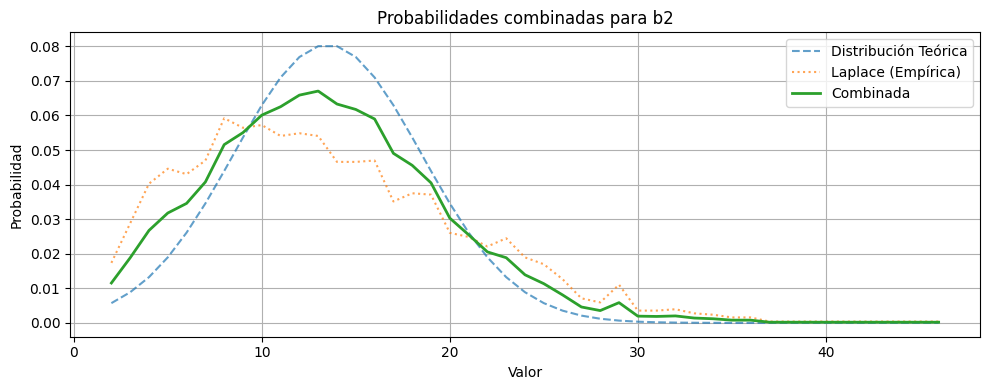

üéØ Siguientes valores m√°s probables para b2:
  13: 0.0671
  12: 0.0659
  14: 0.0633
  11: 0.0625
  15: 0.0617
  10: 0.0601
  16: 0.0590
  9: 0.0550
  8: 0.0516
  17: 0.0490


In [33]:
col_analyze = "b2"
values_explore = dfRows[col_analyze].to_list()
values_explore.reverse()

# valores m√°s probables usando mezcla 50% te√≥rica y 50% datos
top_valores = calcular_probabilidades_hibridas(col_analyze, values_explore, mezcla=0.5, graficar=True, top_n=10)

print(f"üéØ Siguientes valores m√°s probables para {col_analyze}:")
for val, prob in top_valores:
    print(f"  {val}: {prob:.4f}")
